In [1]:
# Cell 1 – Imports
import pandas as pd

# Cell 2 – Load the data (adjust the relative/absolute path if needed)
df = pd.read_csv('train.csv')   # if the CSV is in the same notebook folder
# df = pd.read_csv('/full/path/to/train.csv')  # use full path if elsewhere

# Cell 3 – Basic structural check
df.info()

# Cell 4 – Summary statistics (numeric + categoricals)
df.describe(include='all')

# Cell 5 – Value counts for all categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f'\n===== {col} =====')
    print(df[col].value_counts(dropna=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

===== Name =====
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                            

In [2]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


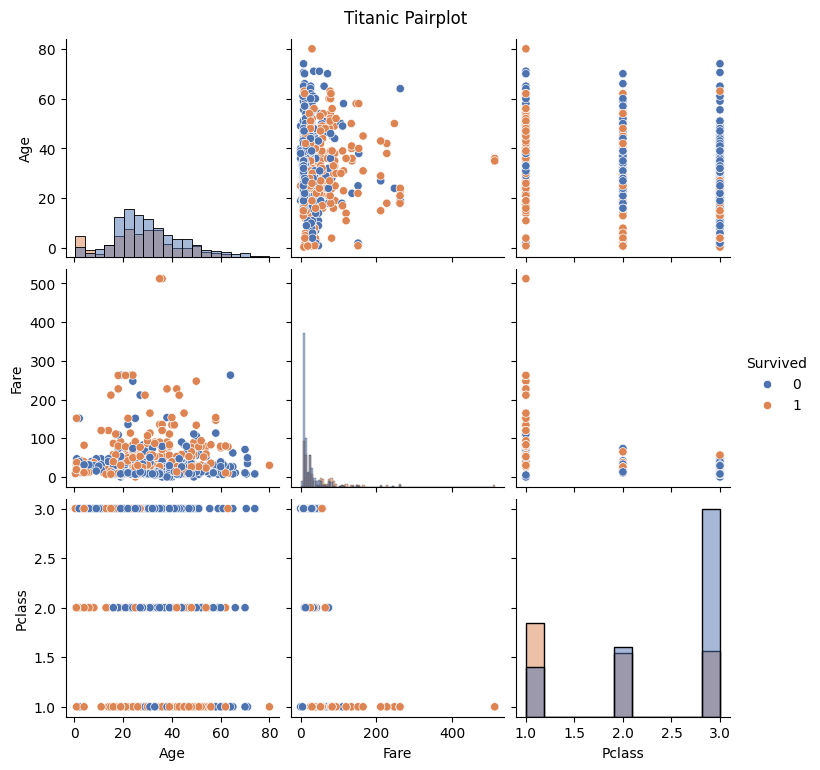

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
cols_to_plot = ['Survived', 'Age', 'Fare', 'Pclass']
pairplot_df = df[cols_to_plot].dropna()

# Make the pairplot
sns.pairplot(
    data=pairplot_df,
    vars=['Age', 'Fare', 'Pclass'],   # numeric axes only; Survived used for hue
    hue='Survived',                   # colour by survival (0 = died, 1 = survived)
    palette='deep',
    diag_kind='hist'                  # histograms on the diagonal
)

plt.suptitle('Titanic Pairplot', y=1.02)  # move title slightly above the plot
plt.show()

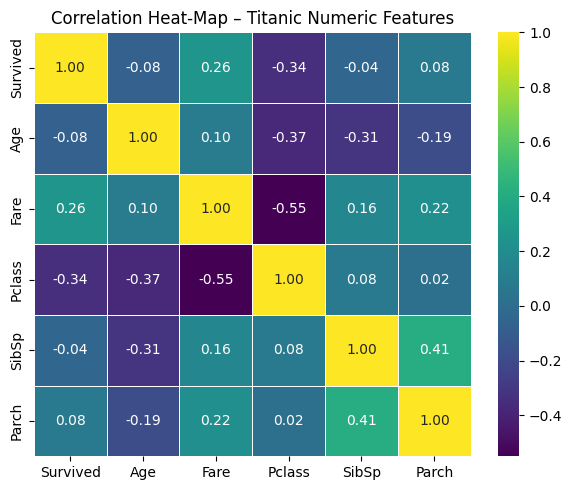

In [5]:
num_cols = ['Survived', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch']

# Compute Pearson correlation matrix (rows with any NaNs are automatically skipped)
corr = df[num_cols].corr()

# Draw the heat-map
plt.figure(figsize=(6, 5))
sns.heatmap(
    corr,
    annot=True,        # write the correlation coefficient in each cell
    fmt='.2f',         # 2-decimal formatting
    cmap='viridis',    # colour palette (change if you like)
    linewidths=0.5
)

plt.title('Correlation Heat-Map – Titanic Numeric Features')
plt.tight_layout()
plt.show()

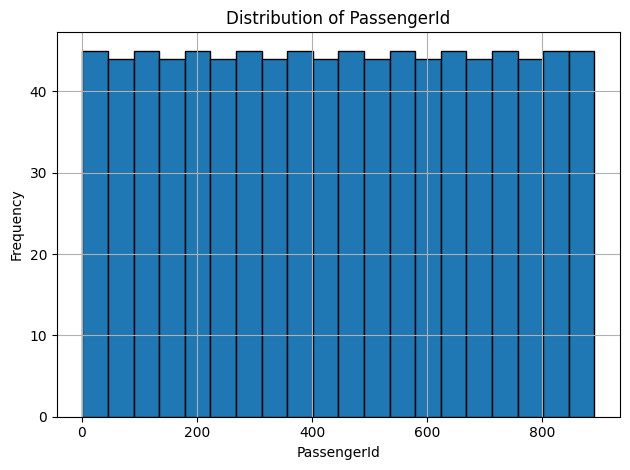

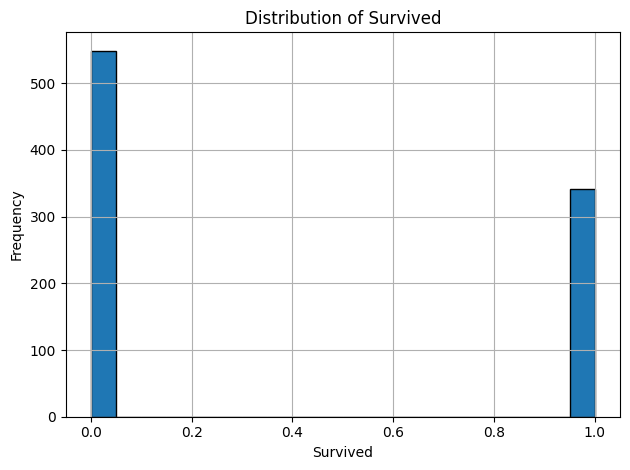

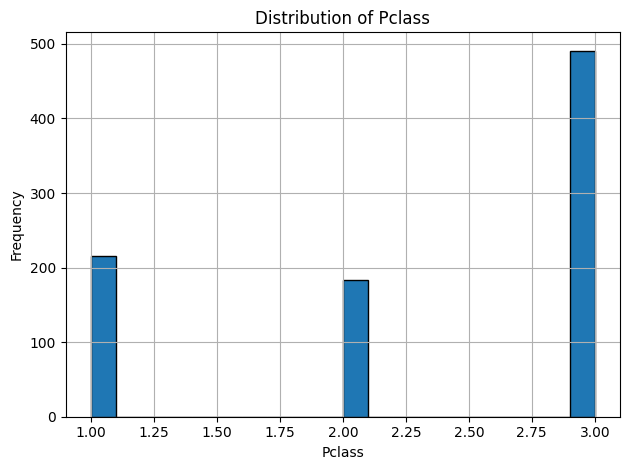

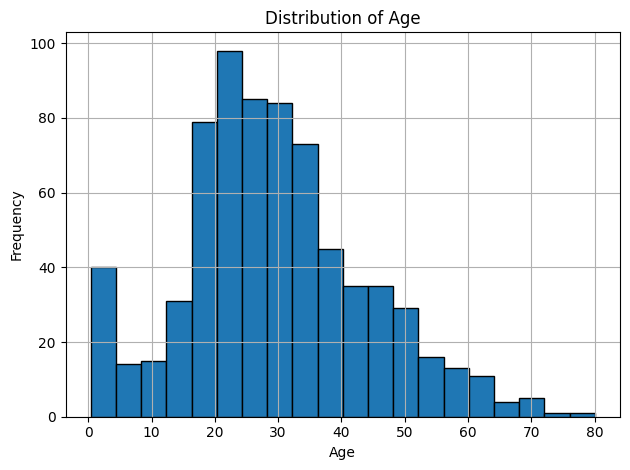

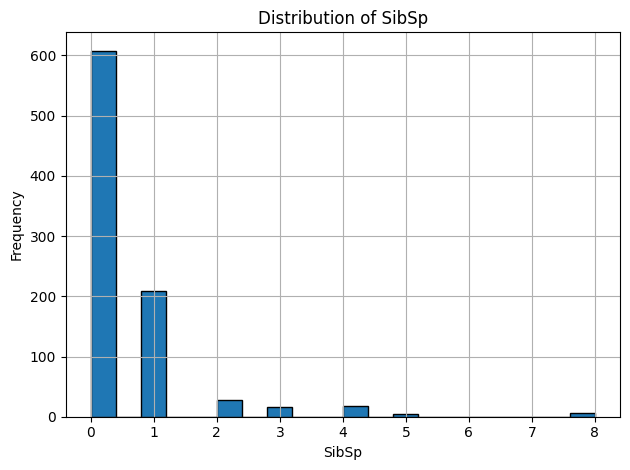

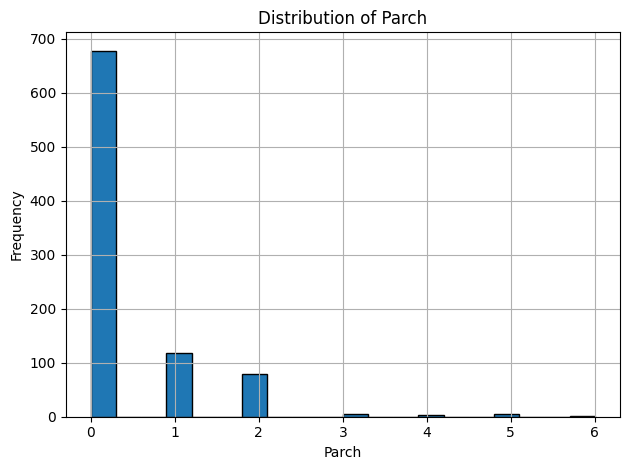

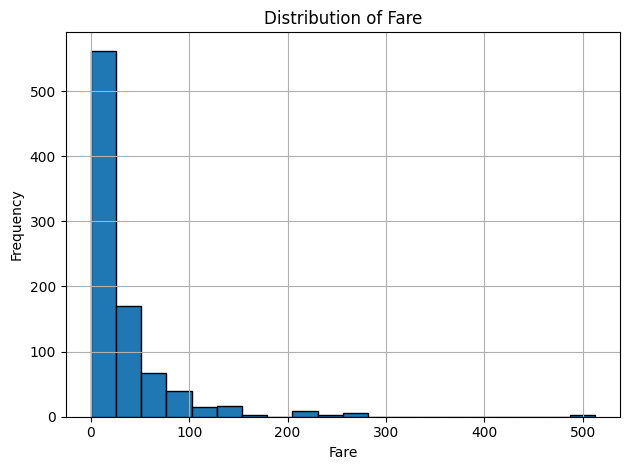

In [6]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot a histogram for each numeric feature
for col in numeric_cols:
    plt.figure()
    df[col].hist(bins=20, edgecolor='black')   # 20 bins; adjust as you like
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

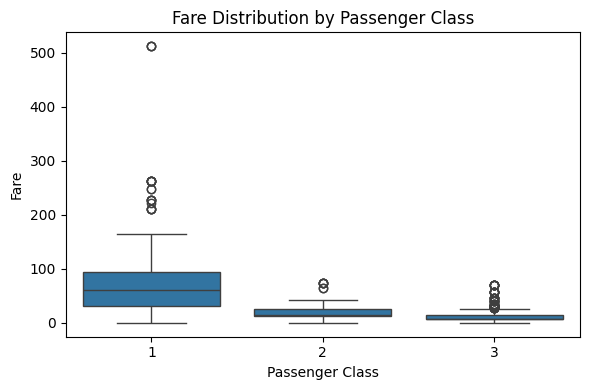

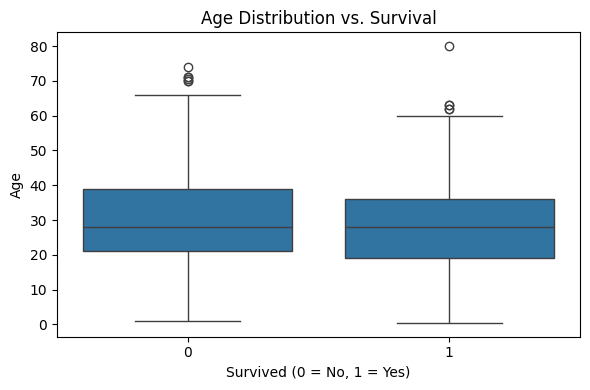

In [7]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.tight_layout()
plt.show()

# 2️⃣ Box-plot of Age by survival status
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution vs. Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

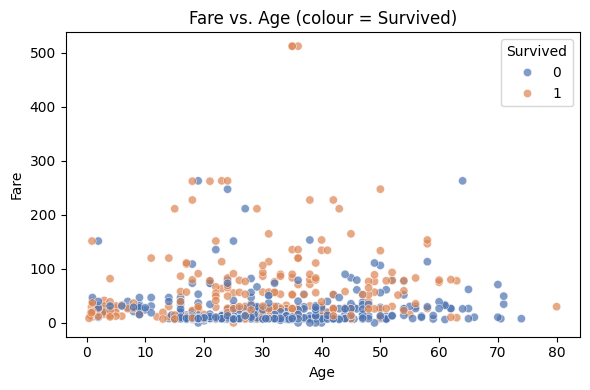

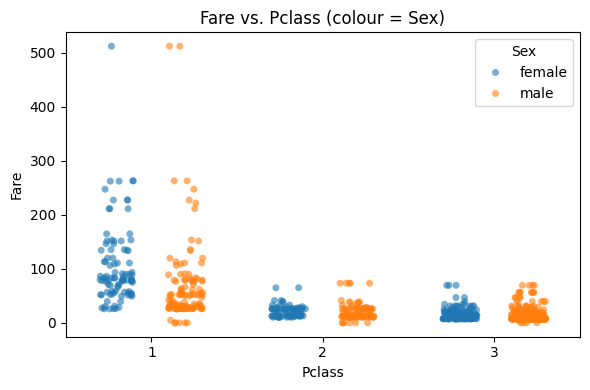

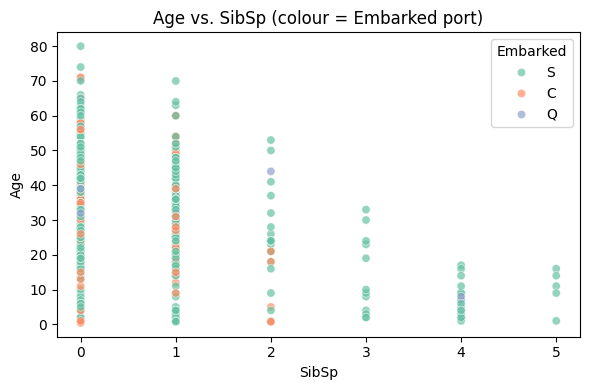

In [8]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x='Age', y='Fare',
    hue='Survived',           # 0 = died, 1 = survived
    palette='deep',
    alpha=0.7                 # a bit of transparency helps with over-plotting
)
plt.title('Fare vs. Age (colour = Survived)')
plt.tight_layout()
plt.show()

# Ⓑ Fare vs. Passenger Class — jittered & coloured by Sex
plt.figure(figsize=(6,4))
sns.stripplot(               # strip/jitter plot ≈ scatter for categorical x-axis
    data=df,
    x='Pclass', y='Fare',
    hue='Sex',
    dodge=True,               # separate male/female points
    jitter=0.2,
    alpha=0.6
)
plt.title('Fare vs. Pclass (colour = Sex)')
plt.tight_layout()
plt.show()

# Ⓒ Age vs. Number of Siblings/Spouses (SibSp) — colour = Embarked
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x='SibSp', y='Age',
    hue='Embarked',
    palette='Set2',
    alpha=0.7
)
plt.title('Age vs. SibSp (colour = Embarked port)')
plt.tight_layout()
plt.show()